In [2]:
from utils_db import dict_load_json
path_settings = '/home/bmelman/Desktop/C_disk/02_university/06_thesis/01_code/fever/_04_results/01_score_combination/neural_network/model_equal_class_1_train_adj_LogisticRegression/settings.json'
settings = dict_load_json(path_settings)

In [3]:
settings

{'training': {'epoch_1': {'loss': 0.011373805665133293,
   'acc': 49.473684210526315},
  'epoch_2': {'loss': 0.011204611376712196, 'acc': 52.35087719298246},
  'epoch_3': {'loss': 0.011159593389745344, 'acc': 53.54385964912281},
  'epoch_4': {'loss': 0.011092360981723719, 'acc': 55.01754385964912},
  'epoch_5': {'loss': 0.011027130871488338, 'acc': 59.78947368421053}},
 'test': {'epoch_1': {'loss': 0.01362599066968234, 'acc': 44.0251572327044},
  'epoch_2': {'loss': 0.013309957846155707, 'acc': 49.685534591194966},
  'epoch_3': {'loss': 0.0132333793730106, 'acc': 47.16981132075472},
  'epoch_4': {'loss': 0.013120744213368158, 'acc': 50.314465408805034},
  'epoch_5': {'loss': 0.013034829178696158, 'acc': 53.459119496855344}},
 'path_final_model': '/home/bmelman/C_disk/02_university/06_thesis/01_code/fever/_04_results/01_score_combination/neural_network/model_equal_class_1_train_adj_LogisticRegression/model_epoch_5.pt',
 'epoch_final_model': 5}

In [47]:
idx = 1
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
epoch_list = []

for key in settings['training']:
    epoch_list.append(idx)
    
    train_loss_list.append(settings['training'][key]['loss'])
    train_acc_list.append(settings['training'][key]['acc'])
    test_loss_list.append(settings['test'][key]['loss'])
    test_acc_list.append(settings['test'][key]['acc'])
    
    idx+=1


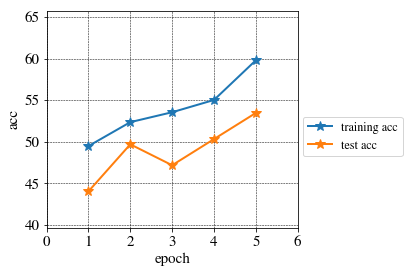

In [80]:
import matplotlib
import matplotlib.pyplot as plt

x = [epoch_list, epoch_list]
y = [train_acc_list, test_acc_list]
label_list = ['training acc', 'test acc']
x_min = 0
x_max = max(max(experiment) for experiment in x)+1
y_min = min(min(experiment) for experiment in y)*0.9
y_max = max(max(experiment) for experiment in y)*1.1

fontsize = 15

path_save = 'acc.png'

save_plot(x_list = x, y_list = y, x_label_str = 'epoch', y_label_str ='acc', label_list = label_list,
          x_min = x_min, x_max = x_max, y_min = y_min, y_max = y_max, fontsize = fontsize, path_save = path_save)


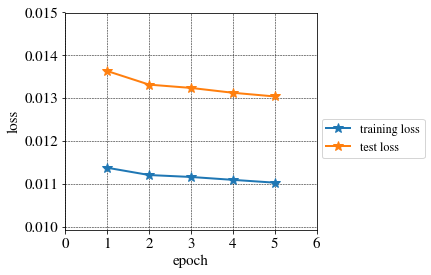

In [78]:
import matplotlib
import matplotlib.pyplot as plt

x = [epoch_list, epoch_list]
y = [train_loss_list, test_loss_list]
label_list = ['training loss', 'test loss']
x_min = 0
x_max = max(max(experiment) for experiment in x)+1
y_min = min(min(experiment) for experiment in y)*0.9
y_max = max(max(experiment) for experiment in y)*1.1
fontsize = 15

path_save = 'loss.png'

save_plot(x_list = x, y_list = y, x_label_str = 'epoch', y_label_str ='loss', label_list = label_list,
          x_min = x_min, x_max = x_max, y_min = y_min, y_max = y_max, fontsize = fontsize, path_save = path_save)


In [77]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

def save_plot(x_list, y_list, x_label_str, y_label_str, label_list, x_min, x_max, y_min, y_max, fontsize, path_save):
    plt.figure()
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    for i in range(len(x_list)):
        x = x_list[i]
        y = y_list[i]
        label = label_list[i]
        plt.plot(x, y, '-*', linewidth=2, markersize=10, label=label)
        
    plt.grid(color='k', linestyle='--', linewidth=0.5)

    plt.xlabel(x_label_str, fontsize=fontsize)
    plt.ylabel(y_label_str, fontsize=fontsize)
    
    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    
    plt.legend(loc=(1.02, 0.33), fontsize=fontsize-3)
    
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.savefig(path_save)
    plt.show()

    